In [602]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [603]:
path = "../data/number/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
df_number = pd.DataFrame(columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])

for file in onlyfiles:
    with open(path+file) as f:
        content = f.readlines()
        label = int(content[0])

        strokes = int(content[len(content)-1][11:12]) #How many strokes of the pen
        n_row = 3
        x = []
        y = []
        time_taken   = []

        for _ in range(strokes):
            if n_row < len(content)-3:
                if(content[n_row] == "Pen Down (x,y)\n"):
                    n_row =+ 1
                
                while content[n_row] != 'Pen Up\n' and content[n_row] != '\n': #Take all of the axis
                    xi, yi = content[n_row].split('_')
                    yi = yi[:-1]
                    n_row += 1
                    x.append(float(xi))
                    y.append(float(yi))
                    if n_row >= len(content)-3 :
                        break

                n_row += 1

                if content[n_row][0] == "T": #If there is written "Time_taken"
                    time_taken.append(content[n_row][11:16])
                    n_row += 1
                
                if content[n_row][0] == "T": #There are double "Time_taken" 
                    n_row += 1
        
        speed = content[len(content)-2][7:12]
        

        df_temp = pd.DataFrame([[label,x,y,time_taken, speed, strokes]], columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
        df_number = pd.concat([df_number, df_temp])


df_number = df_number.drop(columns="time_taken") 

# Drop column time_taken beacuse is not good. It can be fixed
# But it's not so important because we have also the ratio speed that is strokes/seconds



In [604]:
# df_number.to_csv("data/number/number.csv", index=False)

In [605]:
# df_number = pd.read_csv("data/number.csv")

# train_size = int(0.7*len(df_number))
df_number_train = df_number
# df_number_test = df_number[train_size:]

In [606]:
df_number_train[df_number_train['x'].map(lambda d: len(d)) > 0]

for i in range(len(df_number_train)):
    if df_number_train.iloc[i,1] == []:
        df_number_train.iloc[i,1] = np.nan

df_number_train.dropna(subset=['x'], inplace=True)
df_number_train

,label,x,y,speed,strokes
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1
0,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1
0,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1
0,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1
0,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1
...,...,...,...,...,...
0,9,"[494.0, 450.0, 424.0, 404.0, 391.0, 387.0, 384...","[100.0, 124.0, 143.0, 165.0, 189.0, 201.0, 238...",3.490,3
0,4,"[864.0, 826.0, 788.0, 775.0, 749.0, 724.0, 688...","[251.0, 320.0, 389.0, 411.0, 452.0, 490.0, 540...",2.908,2
0,2,"[234.0, 256.0, 266.0, 299.0, 313.0, 363.0, 382...","[155.0, 123.0, 112.0, 80.0, 70.0, 47.0, 41.0, ...",1.230,1
0,0,"[680.0, 670.0, 656.0, 643.0, 627.0, 609.0, 593...","[219.0, 223.0, 233.0, 248.0, 269.0, 297.0, 329...",1.049,1


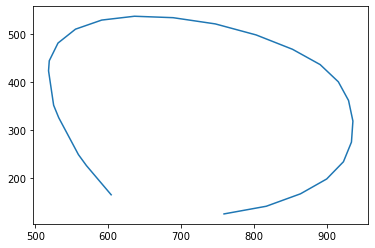

In [607]:
n = 45
# plt.plot(df_number['x'].iloc[0], df_number['y'].iloc[0])
plt.plot(df_number_train['x'].iloc[n], df_number_train['y'].iloc[n])
# plt.plot(df_number['x'].iloc[2], df_number['y'].iloc[2])
# plt.plot(df_number['x'].iloc[3], df_number['y'].iloc[3])

#Sono al contrario

In [608]:
df_number_train.iloc[n]

label                                                      0
x          [604.0, 570.0, 559.0, 532.0, 525.0, 518.0, 519...
y          [165.0, 226.0, 249.0, 326.0, 352.0, 424.0, 445...
speed                                                  2.559
strokes                                                    1
Name: 0, dtype: object

In [609]:
# Take only a subset of the dataframe
# df_number_train = df_number_train[:10]  #THEN REMOVE

# RIMUOVO QUELLI CON PIÙ DI UN STROKE PERCHÉ MI ROMPONO IL CAZZO (poi aggiustare)
df_number_train = df_number_train[df_number_train['strokes'] == 1]

# Rimuovo tutte quelle con < 11 (x,y)
df_number_train = df_number_train[df_number_train['x'].map(lambda d: len(d)) > 15]

index = pd.Series(np.arange(len(df_number_train)))
df_number_train.set_index(index, inplace=True)

In [610]:
# Calculate angle between two points in a strange mathod (BUT correct)

def calculate_angle_of_two_points(x1, y1, x2, y2):
    angle = np.arctan2(y2-y1, x2-x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_angle_of_two_points(number['x'][p], number['y'][p], number['x'][p+1], number['y'][p+1])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['angles'] = angles
df_number_train.head()

,label,x,y,speed,strokes,angles
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ..."


In [611]:
# df_number_train
# B è la distanza da quello prima
# C è la distanza da quello dopo
# A è la tangente del punto

angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(4,len(number['x'])-4):
        B = np.sqrt((number['x'][p] - number['x'][p+4])**2 + (number['y'][p] - number['y'][p+4])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-4])**2 + (number['y'][p] - number['y'][p-4])**2)
        A = np.sqrt((number['x'][p+4] - number['x'][p-4])**2 + (number['y'][p+4] - number['y'][p-4])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['angles_tangent'] = angles
# df_number_train['angles_tangent'].iloc[10] #- df_number_train['angles'].iloc[10]
# list(set(df_number_train['angles_tangent'].iloc[10]) - set(df_number_train['angles'].iloc[10]))
# df_number_train

/tmp/ipykernel_8215/2588303590.py:16: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))


In [612]:
class_one = df_number_train[df_number_train['label'] == 1]
class_one
# type(df_number_train['angles'])


,label,x,y,speed,strokes,angles,angles_tangent
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4...","[2.9492, 3.1018, 3.1353, 3.087, 3.0896, 3.1243..."
14,1,"[851.0, 855.0, 856.0, 858.0, 858.0, 858.0, 858...","[309.0, 346.0, 358.0, 396.0, 423.0, 450.0, 476...",3.571,1,"[1.46, 1.49, 1.52, 1.57, 1.57, 1.57, 1.61, 1.5...","[3.0714, 3.1026, 3.1053, 3.1306, 3.0978, 3.076..."
27,1,"[563.0, 570.0, 573.0, 575.0, 575.0, 574.0, 573...","[114.0, 141.0, 167.0, 201.0, 262.0, 284.0, 353...",2.782,1,"[1.32, 1.46, 1.51, 1.57, 1.62, 1.59, 1.56, 1.5...","[3.0657, 3.1371, 3.1006, 3.0768, 3.0729, 3.093..."
49,1,"[591.0, 592.0, 595.0, 597.0, 599.0, 600.0, 598...","[179.0, 179.0, 183.0, 188.0, 196.0, 208.0, 233...",1.694,1,"[0.0, 0.93, 1.19, 1.33, 1.49, 1.65, 1.7, 1.72,...","[2.6111, 2.7582, 2.9744, 3.0857, 3.0994, 3.033..."
52,1,"[757.0, 759.0, 759.0, 759.0, 757.0, 754.0, 751...","[115.0, 145.0, 169.0, 198.0, 228.0, 261.0, 313...",3.496,1,"[1.5, 1.57, 1.57, 1.64, 1.66, 1.63, 1.65, 1.65...","[3.0677, 3.1197, 3.1326, 3.1206, 3.113, 3.1232..."
53,1,"[836.0, 833.0, 830.0, 828.0, 826.0, 822.0, 820...","[165.0, 197.0, 219.0, 243.0, 256.0, 295.0, 308...",3.199,1,"[1.66, 1.71, 1.65, 1.72, 1.67, 1.72, 1.74, 1.7...","[3.1008, 3.0652, 3.0609, 3.0791, 3.0883, 3.137..."
73,1,"[677.0, 678.0, 678.0, 678.0, 678.0, 678.0, 677...","[176.0, 174.0, 175.0, 180.0, 189.0, 201.0, 215...",1.470,1,"[-1.11, 1.57, 1.57, 1.57, 1.57, 1.64, 1.74, 1....","[2.9357, 2.9746, 2.9776, 3.0473, 3.1029, 3.123..."
92,1,"[644.0, 644.0, 644.0, 644.0, 642.0, 640.0, 637...","[193.0, 208.0, 224.0, 244.0, 264.0, 283.0, 300...",1.828,1,"[1.57, 1.57, 1.57, 1.67, 1.68, 1.75, 1.76, 1.7...","[3.0216, 3.0645, 3.1013, 3.0036, 2.9601, 3.011..."
94,1,"[744.0, 741.0, 736.0, 730.0, 718.0, 708.0, 698...","[167.0, 168.0, 178.0, 194.0, 240.0, 286.0, 334...",1.878,1,"[2.82, 2.03, 1.93, 1.83, 1.78, 1.78, 1.71, 1.6...","[2.9621, 2.9974, 2.9891, 2.9834, 2.9927, 3.032..."
113,1,"[632.0, 629.0, 628.0, 628.0, 628.0, 628.0, 628...","[41.0, 68.0, 92.0, 120.0, 151.0, 186.0, 225.0,...",2.908,1,"[1.68, 1.61, 1.57, 1.57, 1.57, 1.57, 1.59, 1.6...","[3.1306, 3.1148, 3.0898, 3.0916, 3.11, 3.1137,..."


In [613]:
# train test split

X_train, test = train_test_split(df_number_train, test_size=0.2, random_state=42)

%store test

print("shapes: ", X_train.shape, test.shape)

Stored 'test' (DataFrame)
shapes:  (698, 7) (175, 7)


In [614]:
#Divide the dataframe for each label 
# Since we will contruct a HMM for each label

temp = X_train.groupby(['label'])
df_classes = {}
# for row in df_number_train:
#     df_classes[row]['label'].append(row)
for name, group in temp:
    df_classes[name] = group
    print("len of class ", name, ": ", len(group))


# See if x and y are only numbers (Se ho sbagliato ad importare da tutti i file txt)
for name, group in df_classes.items():
    for i in range(len(group)):
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['angles']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['angles']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")

#Divide the dataset into the different classes

len of class  0 :  92
len of class  1 :  45
len of class  2 :  104
len of class  3 :  89
len of class  5 :  28
len of class  6 :  94
len of class  7 :  63
len of class  8 :  99
len of class  9 :  84


In [615]:
%store df_classes

Stored 'df_classes' (dict)


Dataset is balanced


## HMM problem and solutions
* Evaluation:
    * Problem - Compute Probabilty of observation sequence given a model
    * Solution - Forward Algorithm and Viterbi Algorithm
* Decoding:
    * Problem - Find state sequence which maximizes probability of observation sequence
    * Solution - Viterbi Algorithm
* Training:
    * Problem - Adjust model parameters to maximize probability of observed sequences
    * Solution - Forward-Backward Algorithm